Some importings

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In our work, the steps will be as follows:

* 1- data overview and data cleaning
* 2- splitting the data into two parts
* 3- scaling of data
* 4- training the data
* 5- run the model
* 6- evaluation of the model

Reading data and an overview to look how data looks like:

In [2]:
dataFrame = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/bmw.csv")
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


We are going to solve a regression problem, but there are 3 non-numeric columns (model, transmission, fuel type).
In this case, we will either delete these columns or convert the data to a numeric form. 
Instead of deleting the columns, using 'dummy variables' to convert them to a numerical form will make our model work more accurately.
But we're going to do this right before we build the model, now let's get some idea of of the data.

<AxesSubplot:xlabel='price', ylabel='Density'>

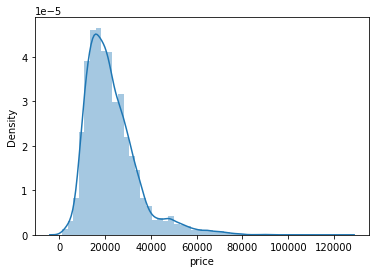

In [3]:
sbn.distplot(dataFrame["price"])

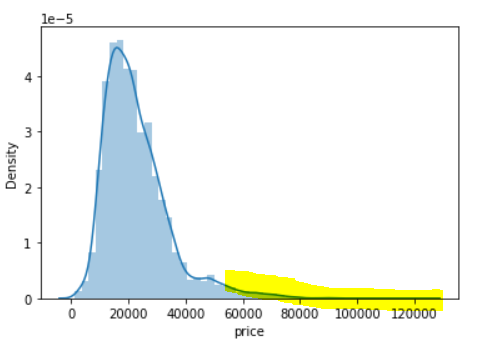
The region I specified in the yellow part distorts the 'normal distribution', it is a choice to remove that part from the data, I will remove that part for my model to work more accurately. 
But first, let's get a little more insight into the data.

<AxesSubplot:xlabel='year', ylabel='count'>

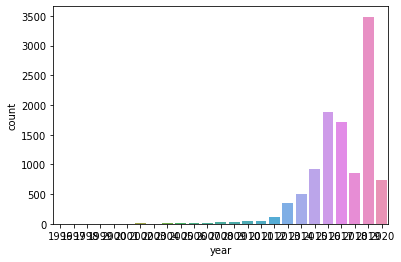

In [4]:
sbn.countplot(dataFrame["year"])

We looked at which 'year' and how many cars were sold, the year information is mixed on the x-axis in the graph, but that's okay, we already know that it is between 1970-2020.
What we can understand from here is that there are mostly cars in 2019, there are few cars based on old years, for now we will not do anything about it.
Let's take a look at the correlation information.

In [5]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


This is how we can look at the correlation of all columns to each other, but in this example we are only concerned with the correlation between price and other data.



In [6]:
dataFrame.corr()["price"].sort_values()

mileage      -0.605397
mpg          -0.204882
tax           0.263484
engineSize    0.460196
year          0.623756
price         1.000000
Name: price, dtype: float64

In this way, we looked at the correlation information of 'price' specifically, we added 'sort_values of ( )' so that we can see what the most and least correlated feature is.
So what do we understand by looking at this table? The correlation of price with price is 1 this is already normal, then the year with the highest correlation value of 0.62, it seems that price affects the most 'year', in other words, 'mpg' in other words, mile per gallon correlation is negative. It shows that it affects negatively, that is, the higher the mpg rises, the lower the price, so the more the vehicle consumes, the more the price increases and people do not want to buy the vehicle, the most negative effect is 'mileage', that is, how many kilometers the car travels, which is logical anyway. Finally, we can say that the negative correlation creates an oppositional relationship as if it increases, it decreases, if it decreases, it increases.

In [7]:
# now the part about shaving off some of the data breaking the 'normal distribution'.
# I previously showed that region in yellow on the graph. First, let's sort the dataset by 'price'.
dataFrame.sort_values("price",ascending = False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4
6115,8 Series,2020,79991,Semi-Auto,151,Diesel,145,26.7,3.0
7024,X7,2020,79566,Semi-Auto,1000,Petrol,145,24.8,3.0
2602,X7,2020,78490,Semi-Auto,4919,Diesel,145,31.4,3.0


As seen here, there are some dirty data in our data set, we only showed 20 of them, generally in such cases, if 99% of the data is taken, we can continue without disturbing the general table of the data.
So we can subtract 1%.

In [8]:
len(dataFrame) * 0.01

107.81

We understand from the above that after sorting our dataset in descending order of 'price', we can discard the first 107 rows. So we will get 'more normal' distrubition.

In [9]:
dataFrame.sort_values(["price"],ascending=False).iloc[131:]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5791,X6,2019,61854,Semi-Auto,1000,Diesel,145,34.9,3.0
1907,M5,2019,61797,Semi-Auto,4419,Petrol,145,26.9,4.4
5598,M5,2018,61792,Automatic,5856,Petrol,145,26.9,4.4
6374,X5,2019,61682,Semi-Auto,10782,Diesel,145,33.6,3.0
7768,X5,2019,61550,Automatic,11311,Diesel,150,33.6,3.0
...,...,...,...,...,...,...,...,...,...
7284,5 Series,2002,1595,Automatic,115000,Petrol,325,28.5,2.2
10006,3 Series,2000,1550,Automatic,93000,Petrol,270,29.7,2.5
9554,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0
9696,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0


We used 'iloc'(index-based-location) and our new data frame was created, since extracting 107 rows would be the same as extracting the data from the 107th index.

In [10]:
trimmedDf = dataFrame.sort_values("price",ascending=False).iloc[131:]
trimmedDf.head(15)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5791,X6,2019,61854,Semi-Auto,1000,Diesel,145,34.9,3.0
1907,M5,2019,61797,Semi-Auto,4419,Petrol,145,26.9,4.4
5598,M5,2018,61792,Automatic,5856,Petrol,145,26.9,4.4
6374,X5,2019,61682,Semi-Auto,10782,Diesel,145,33.6,3.0
7768,X5,2019,61550,Automatic,11311,Diesel,150,33.6,3.0
7272,8 Series,2020,61485,Semi-Auto,6374,Diesel,145,26.7,3.0
3544,X5,2019,61083,Semi-Auto,2151,Diesel,145,33.6,3.0
6958,X4,2020,60995,Semi-Auto,100,Petrol,145,24.8,3.0
362,X5,2020,60990,Semi-Auto,3500,Diesel,145,33.6,3.0
7897,8 Series,2019,60000,Automatic,8000,Petrol,145,33.6,3.0


And as you can see, our new data frame has become a data frame with the highest price of 65 thousand, with the first 107 data discarded in descending order, and the cars with a price of 123 thousand were discarded.
Now let's look at the distribution again.

<AxesSubplot:xlabel='price', ylabel='Density'>

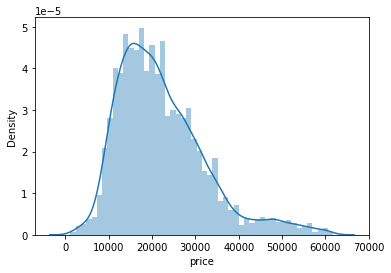

In [11]:
sbn.distplot(trimmedDf["price"])

After data cleaning, the parts on the right that disrupted the normal distribution were almost shaved and became more normal distrubition.
If we trim even more, we'll ruin it, so there's no need.

I discovered something about engineSize, now I want to share it.
When I looked at the lowest engineSize and saw 0, this was interesting and after doing some research on the internet, I learned that engineSize cannot be 0. So after sorting the data according to 'engineSize', I will detect 0 ones and discard them from the data.

In [12]:
trimmedDf.sort_values("engineSize",ascending = True).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7254,i3,2016,19875,Automatic,20013,Hybrid,0,470.8,0.0
4749,i3,2014,15450,Automatic,42479,Hybrid,0,470.8,0.0
6874,i3,2016,15990,Automatic,68000,Hybrid,0,470.8,0.0
7299,i3,2017,21495,Automatic,24041,Hybrid,0,470.8,0.0
7422,1 Series,2017,12800,Manual,18067,Petrol,20,68.9,0.0
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0
6961,i3,2017,20495,Automatic,20082,Hybrid,135,470.8,0.0
8735,2 Series,2016,15000,Automatic,17097,Diesel,20,68.9,0.0
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,0.0
9924,i3,2016,16500,Automatic,35446,Hybrid,0,470.8,0.0


We see that there are cars with engineSize equal to 0, and we don't know the number of them, so let's drop them below.

In [13]:
trimmedDf = trimmedDf[trimmedDf.engineSize != 0]
trimmedDf.sort_values("engineSize",ascending = True)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8620,i3,2017,19300,Automatic,32867,Other,0,470.8,0.6
10530,i3,2017,17600,Automatic,50867,Other,135,470.8,0.6
10325,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6
10080,i3,2017,20000,Automatic,19178,Other,0,470.8,0.6
10086,i3,2017,19500,Automatic,23956,Other,135,470.8,0.6
...,...,...,...,...,...,...,...,...,...
9871,M5,2016,35995,Automatic,39200,Petrol,555,28.5,4.4
907,X5,2017,36898,Automatic,28193,Petrol,150,29.1,4.4
9229,M6,2006,12495,Semi-Auto,89000,Petrol,570,19.1,5.0
9585,7 Series,2017,52950,Automatic,22000,Petrol,150,22.1,6.6


Very good, we've deleted those that are equal to 0.
Now it's time to change our dataFrame.

In [14]:
dataFrame = trimmedDf
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,10603.000000,10603.000000,10603.000000,10603.000000,10603.000000,10603.000000
mean,2017.057908,22168.504291,25744.726964,131.808450,55.192794,2.164878
std,2.349657,10180.007079,25215.369196,61.445517,20.231660,0.520183
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.600000
25%,2016.000000,14800.000000,5656.000000,135.000000,46.300000,2.000000
50%,2017.000000,20216.000000,18807.000000,145.000000,53.300000,2.000000
75%,2019.000000,27496.500000,38598.000000,145.000000,62.800000,2.000000
max,2020.000000,61854.000000,214000.000000,580.000000,470.800000,6.600000


We changed our dataFrame and when we looked at the 'count' line, we understood that yes it has changed.

--- Now, as I said at the beginning, it's time to convert non-numeric columns into numeric with dummy variables! ---


In [15]:
dataFrame = pd.get_dummies(dataFrame, columns=["model"])
dataFrame = pd.get_dummies(dataFrame, columns=["transmission"])
dataFrame = pd.get_dummies(dataFrame, columns=["fuelType"])
dataFrame

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
5791,2019,61854,1000,145,34.9,3.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1907,2019,61797,4419,145,26.9,4.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5598,2018,61792,5856,145,26.9,4.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6374,2019,61682,10782,145,33.6,3.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7768,2019,61550,11311,150,33.6,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,2002,1595,115000,325,28.5,2.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10006,2000,1550,93000,270,29.7,2.5,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9554,2007,1500,167000,125,57.6,2.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9696,2004,1445,162000,205,49.6,2.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


We did what we said above using the ' pd.get_dummies( ) '  function.

In [16]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
5791,2019,61854,1000,145,34.9,3.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1907,2019,61797,4419,145,26.9,4.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5598,2018,61792,5856,145,26.9,4.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6374,2019,61682,10782,145,33.6,3.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7768,2019,61550,11311,150,33.6,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


--- Let's Move to Creating Model After Data Cleaning---

In [17]:
y = dataFrame["price"].values

x = dataFrame.drop("price",axis=1).values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

Initially we defined x and y, while defining y we dropped the unwanted column with drop( ) instead of giving each column one by one, so it was more practical.

We split the data into x and y with train_test_split( ), remember y = ax + b, where y is output, x is feature, b is bias.

In [18]:
len(x_train)

7422

In [19]:
len(x_test)

3181

We looked at the size of x_train and x_test to check that the data was split correctly.

7422 + 3181 = 10603
10603 * 0.3 = 3181 ✓

Before giving the data to the model, we need to scale the data, thanks to this process, the data is placed between 0-1 in a way that the model can understand. The scaling process allows the model to run fast, for example, when a car price is around 60,000, sizing it between 0-1 makes the model run better.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


After importing, we created a variable named scaler and created it as a variable from the MinMaxScaler class, just like an empty list creates an empty array. Then we set the scaler to fit the x_train by saying scaler.fit(x_train), and then we transform the variables related to x.
Instead of first fitting and then transforming, we can also fit and transform at the same time, using .fit_transform( ). I chose this way.

After the scale process is finished, we can move on to creating our model.
In this particular example, we will import two things for our model, Sequential, which is the type of our model, and Dense for our layers.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
x_train.shape

(7422, 37)

After dummy variables, the number of columns increased, we remembered this again.

Let's create our model.

In [23]:
model = Sequential()

model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

We created a variable named 'model' from the Sequential class. This is the name of our model.

Then we add hidden layers to the model, we specify the number of neurons in the layers, I set 40 for now. In the future, we can reduce or increase this by looking at the working performance of the model. We also add activation functions of neurons, 4 of the most known are RelU , Tanh , Sigmoid , Linear. My choice for this example was 'relu'. 
We chose the loss function as 'mse' because we usually use mse when working with regression.


Now it's time to run the model, so let's train the model.

In [24]:
model.fit(x = x_train, y = y_train, batch_size=250, validation_data=(x_test,y_test), epochs=300)


Epoch 1/300
30/30 [==============================] - 1s 24ms/step - loss: 593857734.1935 - val_loss: 607311744.0000
Epoch 2/300
30/30 [==============================] - 0s 5ms/step - loss: 583559384.7742 - val_loss: 533033120.0000
Epoch 3/300
30/30 [==============================] - 0s 5ms/step - loss: 366942116.1290 - val_loss: 87513448.0000
Epoch 4/300
30/30 [==============================] - 0s 5ms/step - loss: 86270699.3548 - val_loss: 66003172.0000
Epoch 5/300
30/30 [==============================] - 0s 4ms/step - loss: 63124496.0000 - val_loss: 55905756.0000
Epoch 6/300
30/30 [==============================] - 0s 5ms/step - loss: 52800949.8065 - val_loss: 47773560.0000
Epoch 7/300
30/30 [==============================] - 0s 5ms/step - loss: 45748014.8387 - val_loss: 42842320.0000
Epoch 8/300
30/30 [==============================] - 0s 5ms/step - loss: 40988738.8387 - val_loss: 38253000.0000
Epoch 9/300
30/30 [==============================] - 0s 5ms/step - loss: 38036062.9677 - v

We can think of 'batch_size' as the capacity of the mouth of the model, giving the model 1 million data at a time can crash the model, so we give it little by little, but if we give it little by little, this time it works slowly, so we have to find the appropriate value, here is how much capacity we will give the batch size. The higher the data number, the higher our batch size should be.

'Epochs' is the number of revolutions, while the model is being trained, we determine how many times the model will go over the data set. Too many epochs lead to 'overfitting'. Too few epochs cause the model to be under-trained, we don't want that. So epochs need to be at an optimal value, there are some methods for this but I won't use it for this example because the number of epochs=300 will be enough for us. (Overfitting: When the model deviates from being based on price estimation according to the feature set to be given to it and only gives the data within itself, it is built based on predicting the correct results. this is also ridiculous and unnecessary, we already know the prices, the important thing is that when we give a new feature set, it can tell us the right price.)

While the model is being trained, we can give the validation data to the model with the help of tensorflow, that is, it can be validated while it is being trained, which automatically gives us the x_test - y_test comparison that we can do manually. Since we do the comparison with the test data, we give the test data into validation_data(), the remaining train data was already used while the model was being trained.

In [25]:
lostData = pd.DataFrame(model.history.history)

We have defined the lostData. Let's have a glance.

In [26]:
lostData.head(10)

,loss,val_loss
0,589488320.0,607311744.0
1,576302976.0,533033120.0
2,242053936.0,87513448.0
3,77235520.0,66003172.0
4,59421212.0,55905756.0
5,51006340.0,47773560.0
6,45504412.0,42842320.0
7,41125996.0,38253000.0
8,37246752.0,34054904.0
9,33529018.0,29494628.0


As you can see, loss and val_loss are close to each other, this is what we wanted.

<AxesSubplot:>

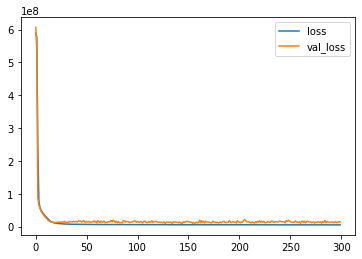

In [27]:
lostData.plot()

Graphic as it should be.

Let's look at error values ​​to understand exactly how well our model works.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

guessArray = model.predict(x_test)

In [29]:
guessArray

array([[15306.525],
       [36153.848],
       [ 9702.636],
       ...,
       [22670.172],
       [19723.82 ],
       [19208.215]], dtype=float32)

In [30]:
mean_absolute_error(y_test,guessArray)   # we see that there is a difference of 2597 pounds

2597.6092670132475

mean_absolute_error is equal to 2597. This means that there may be an average difference of 2597 pounds in the car estimates. So for example; our model can predict a 58k vehicle to be about 60,6k or 55,4k.
Let's do something else to better understand the error.

In [31]:
dataFrame["price"].mean()

22168.50429123833

Mean of cars' price is 22168 and mean_absolute_error is 2597.

(2597 / 22168 ) * 100 = 10.52 

So our error rate is ~ %11.71

What if we didn't get the result we wanted? 

We can go back and clean data, change test size split size, increase epochs, change number of neurons, number of layers, etc. We can make changes in the form, but of course, we should be careful not to overfitting while doing these, because maybe a model that will work very well according to the data we have, may be ridiculous when we enter any feature set, so we should test the model's operation by entering new feature sets.

It's time to look at the regression graph.


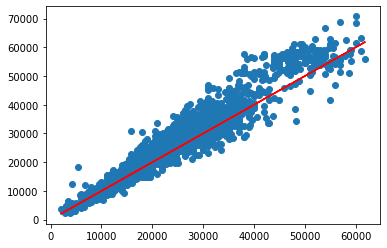

In [32]:
plt.scatter(y_test,guessArray)
plt.plot(y_test,y_test,color="r")

We plotted the regression graph using mathplotlib.pyplot's .scatter () and .plot () functions.                             We got a nice regression graph, a good result overall, even though there were big deviations in a small number of data.

Finally, let's test our model by giving it a real feature set and finish our work. For this test to get a realistic result, the features we will give must also be realistic and logical, so we will use without 'price' a row  from the dataFrame and give it to the model.

In [33]:
dataFrame.iloc[150]["price"]

52995.0

Since we will give the data in the 150. index to the model, we looked at its 'price'=52995

In [34]:
newCarSeries = dataFrame.drop("price",axis=1).iloc[150]

Since the row we will use will be a Series variable, we defined a variable called newCarSeries, and we have assigned the row in the 150th index of the dataFrame to the newCarSeries we just created.

In [35]:
newCarSeries

year                      2019.0
mileage                   6997.0
tax                        145.0
mpg                         37.7
engineSize                   3.0
model_ 1 Series              0.0
model_ 2 Series              0.0
model_ 3 Series              0.0
model_ 4 Series              0.0
model_ 5 Series              0.0
model_ 6 Series              0.0
model_ 7 Series              0.0
model_ 8 Series              0.0
model_ M2                    0.0
model_ M3                    0.0
model_ M4                    0.0
model_ M5                    0.0
model_ M6                    0.0
model_ X1                    0.0
model_ X2                    0.0
model_ X3                    0.0
model_ X4                    0.0
model_ X5                    1.0
model_ X6                    0.0
model_ X7                    0.0
model_ Z3                    0.0
model_ Z4                    0.0
model_ i3                    0.0
model_ i8                    0.0
transmission_Automatic       0.0
transmissi

In [36]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1,37))

Before giving the data to the model, we need to scale it, so we converted the data to 37 column shape and then scaled the data.

In [37]:
model.predict(newCarSeries)

array([[54742.043]], dtype=float32)

Using .predict( ), we give our new feature set to the model, and the prediction data came out 53918.


Example Result =>

# Real Price     : ~ 53000
# Predicted Price: ~ 54700

I am new to Data Science, so I would like to thank Atıl Samancioglu and Murat Mert for their help.